<a href="https://colab.research.google.com/github/emily-coding-kim/sea-lamprey-model/blob/main/Sea_Lamprey_Modeling_%5BMath_142%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Code for the MCM model -- Sea Lamprey (Sandworm) Population Dynamics: Group 5 (Colin Galbraith, Emily Kim, Vivian Zhou)
# Import necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn theme for graphs
sns.set_theme(style="whitegrid")

# Define system of Differential Equations
def sea_lamprey_population(t, y, B, delta2, delta3, alpha, mu, ks, s):
    L, Pm, Pf, Am, Af = y

    # Differential Equations from our model
    dL_dt = B * mu * min(Af, Am) * (1 - L / ks)                  #ODE for Larvae
    dPm_dt = (1 - s) * L - delta2 * Pm                      #ODE for Male Parasites
    dPf_dt = s * L - delta2 * Pf                            #ODE for Female Parasites
    dAm_dt = alpha * Pm - delta3 * Am - mu * min(Af, Am)    #ODE for Male Adult Lamprey
    dAf_dt = alpha * Pf - delta3 * Af - mu * min(Af, Am)    #ODE for Female Adult Lamprey


    return [dL_dt, dPm_dt, dPf_dt, dAm_dt, dAf_dt]


# Natural Conditions parameters & Initial Condition set as default

def model_sea_lamprey_population(B=5, delta2=0.9, delta3=0.9, alpha=0.007, mu=0.3, ks=50,
                                 L0=30, Pm0=25, Pf0=23, Am0=6, Af0=4,
                                 t_span=(0, 50),
                                 s_values=np.linspace(0.25, 0.50, 4)):

    # Initial conditions
    y0 = [L0, Pm0, Pf0, Am0, Af0]
    t_eval = np.linspace(t_span[0], t_span[1], 1000)
    solutions = {}
    fixed_points = {}
    ratios = {}

    for s in s_values:
        # Solve the ODE
        solution = solve_ivp(
            sea_lamprey_population,
            t_span,
            y0,
            args=(B, delta2, delta3, alpha, mu, ks, s),
            t_eval=t_eval,
            method='RK45'
        )
        solutions[s] = solution

        # Compute fixed points
        fpL = ks
        fpPm = (1 - s) * ks / delta2
        fpPf = s * ks / delta2
        fpAm = (alpha * (1 - s) * ks / delta2 - mu * alpha * s * ks / delta2 / (delta3 + mu)) / delta3
        fpAf = alpha * s * ks / delta2 / (delta3 + mu)
        fixed_points[s] = {
            "L": fpL,
            "Pm": fpPm,
            "Pf": fpPf,
            "Am": fpAm,
            "Af": fpAf,
            "Total": fpL + fpPm + fpPf + fpAm + fpAf
        }

        # Calculate ratios
        parasite_ratio = fpPm / fpPf if fpPf != 0 else np.inf
        adult_ratio = fpAm / fpAf if fpAf != 0 else np.inf
        total_parasites = fpPm + fpPf
        total_adults = fpAm + fpAf
        parasite_to_adult_ratio = total_parasites / total_adults if total_adults != 0 else np.inf
        ratios[s] = {
            "Parasite Ratio": parasite_ratio,
            "Adult Ratio": adult_ratio,
            "Total Parasites": total_parasites,
            "Total Adults": total_adults,
            "Parasite to Adult Ratio": parasite_to_adult_ratio
        }

    return {"solutions": solutions, "fixed_points": fixed_points, "ratios": ratios}

# Execute Function
results = model_sea_lamprey_population()

In [53]:
def print_fixed_points(results):
    for s, fixed_point in results["fixed_points"].items():
        print(f"Fixed Points for s = {s}:")
        for key, value in fixed_point.items():
            print(f"{key}: {value}")
        print()

print_fixed_points(results)

Fixed Points for s = 0.25:
L: 50
Pm: 41.666666666666664
Pf: 13.88888888888889
Am: 0.29706790123456794
Af: 0.08101851851851852
Total: 105.93364197530863

Fixed Points for s = 0.3333333333333333:
L: 50
Pm: 37.03703703703704
Pf: 18.518518518518515
Am: 0.2520576131687243
Af: 0.10802469135802469
Total: 105.91563786008231

Fixed Points for s = 0.41666666666666663:
L: 50
Pm: 32.407407407407405
Pf: 23.148148148148145
Am: 0.20704732510288068
Af: 0.13503086419753085
Total: 105.89763374485595

Fixed Points for s = 0.5:
L: 50
Pm: 27.77777777777778
Pf: 27.77777777777778
Am: 0.16203703703703703
Af: 0.16203703703703703
Total: 105.87962962962962



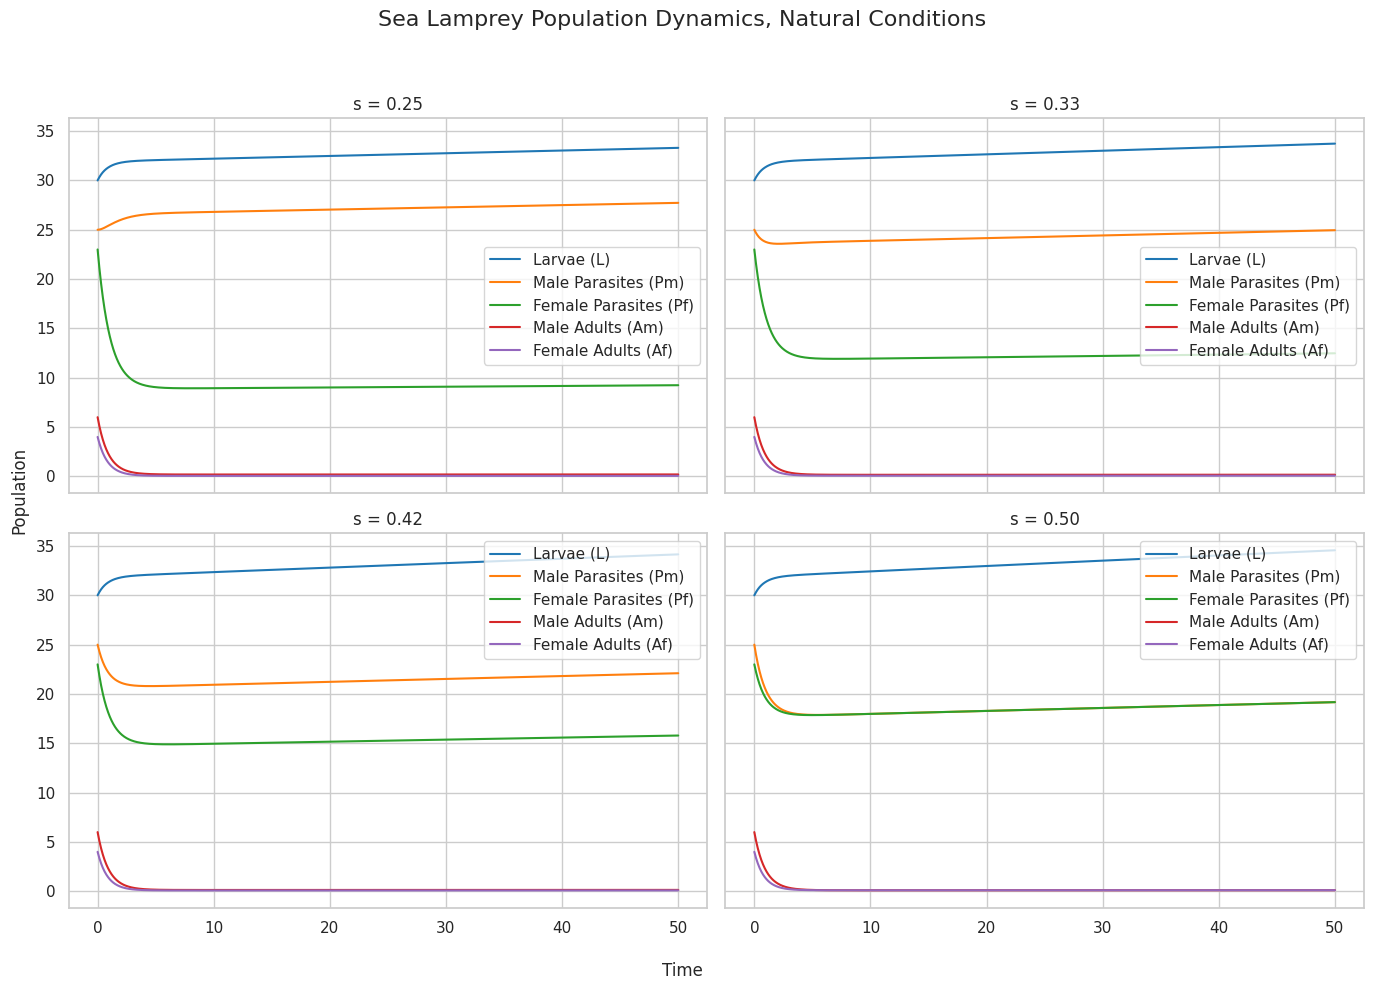

In [40]:
################################ Figure 1 ###############################
def plot_dynams(results):
  palette = sns.color_palette("tab10", 5)
  fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
  axes = axes.flatten()

  # Loop through all values of s and graph on their own subplot
  for ax, (s, solution) in zip(axes, results["solutions"].items()):
      # Extract time points and populations
      t = solution.t  # Time points
      L, Pm, Pf, Am, Af = solution.y  # Populations

      sns.lineplot(x=t, y=L, label="Larvae (L)", color=palette[0], ax=ax)
      sns.lineplot(x=t, y=Pm, label="Male Parasites (Pm)", color=palette[1], ax=ax)
      sns.lineplot(x=t, y=Pf, label="Female Parasites (Pf)", color=palette[2], ax=ax)
      sns.lineplot(x=t, y=Am, label="Male Adults (Am)", color=palette[3], ax=ax)
      sns.lineplot(x=t, y=Af, label="Female Adults (Af)", color=palette[4], ax=ax)

      ax.set_title(f"s = {s:.2f}")

  fig.suptitle("Sea Lamprey Population Dynamics, Natural Conditions", fontsize=16)
  fig.supxlabel("Time", fontsize=12)
  fig.supylabel("Population", fontsize=12)

  plt.tight_layout(rect=[0, 0, 1, 0.95])
  plt.show()

plot_dynams(results)
################################ END Figure 1 ###############################


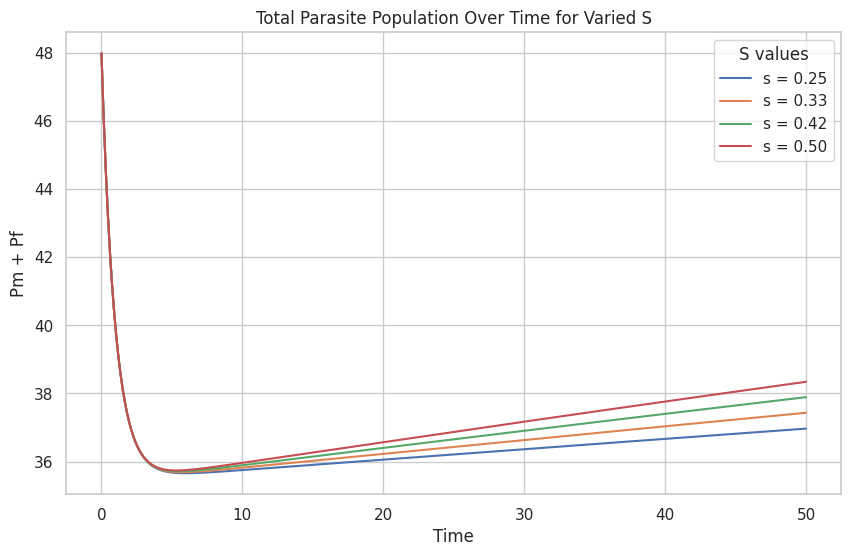

In [44]:
# ################################ Figure 2: Parasite Population for Varied S, Default Parameters ###############################
# Plotting the trajectories of Pm + Pf for each value of s
def plot_parasite_totals(results):
    solutions = results["solutions"]
    s_values = solutions.keys()

    plt.figure(figsize=(10, 6))
    for s in s_values:
        solution = solutions[s]
        t = solution.t
        Pm = solution.y[1]  # Index 1 corresponds to Pm
        Pf = solution.y[2]  # Index 2 corresponds to Pf
        Pm_Pf = Pm + Pf      # Sum of Pm and Pf

        plt.plot(t, Pm_Pf, label=f"s = {s:.2f}")

    plt.title("Total Parasite Population Over Time for Varied S")
    plt.xlabel("Time")
    plt.ylabel("Pm + Pf")
    plt.legend(title="S values")
    plt.grid(True)
    plt.show()

# Call the plotting function
plot_parasite_totals(results)

# ################################ END Figure 2 ###############################

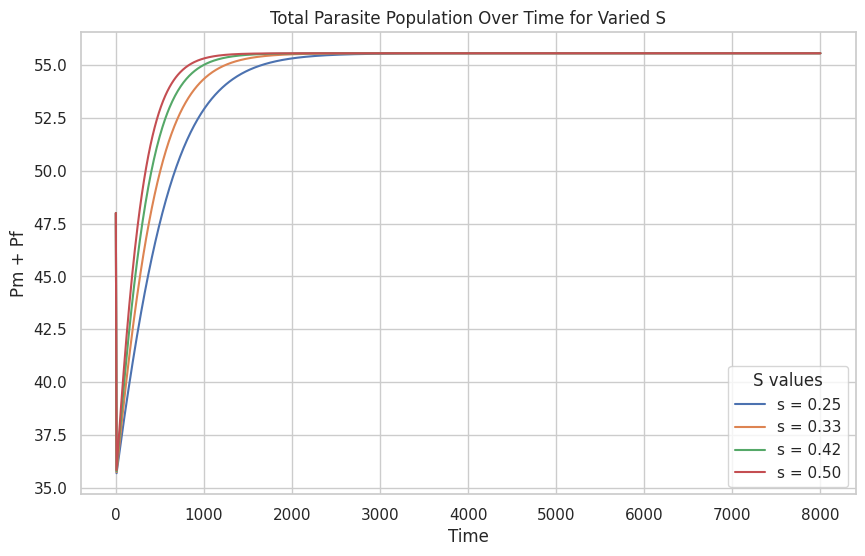

In [56]:
# Zoom out to see this total parasite population over long time
results_long = model_sea_lamprey_population(t_span=(0, 8000))
plot_parasite_totals(results_long)

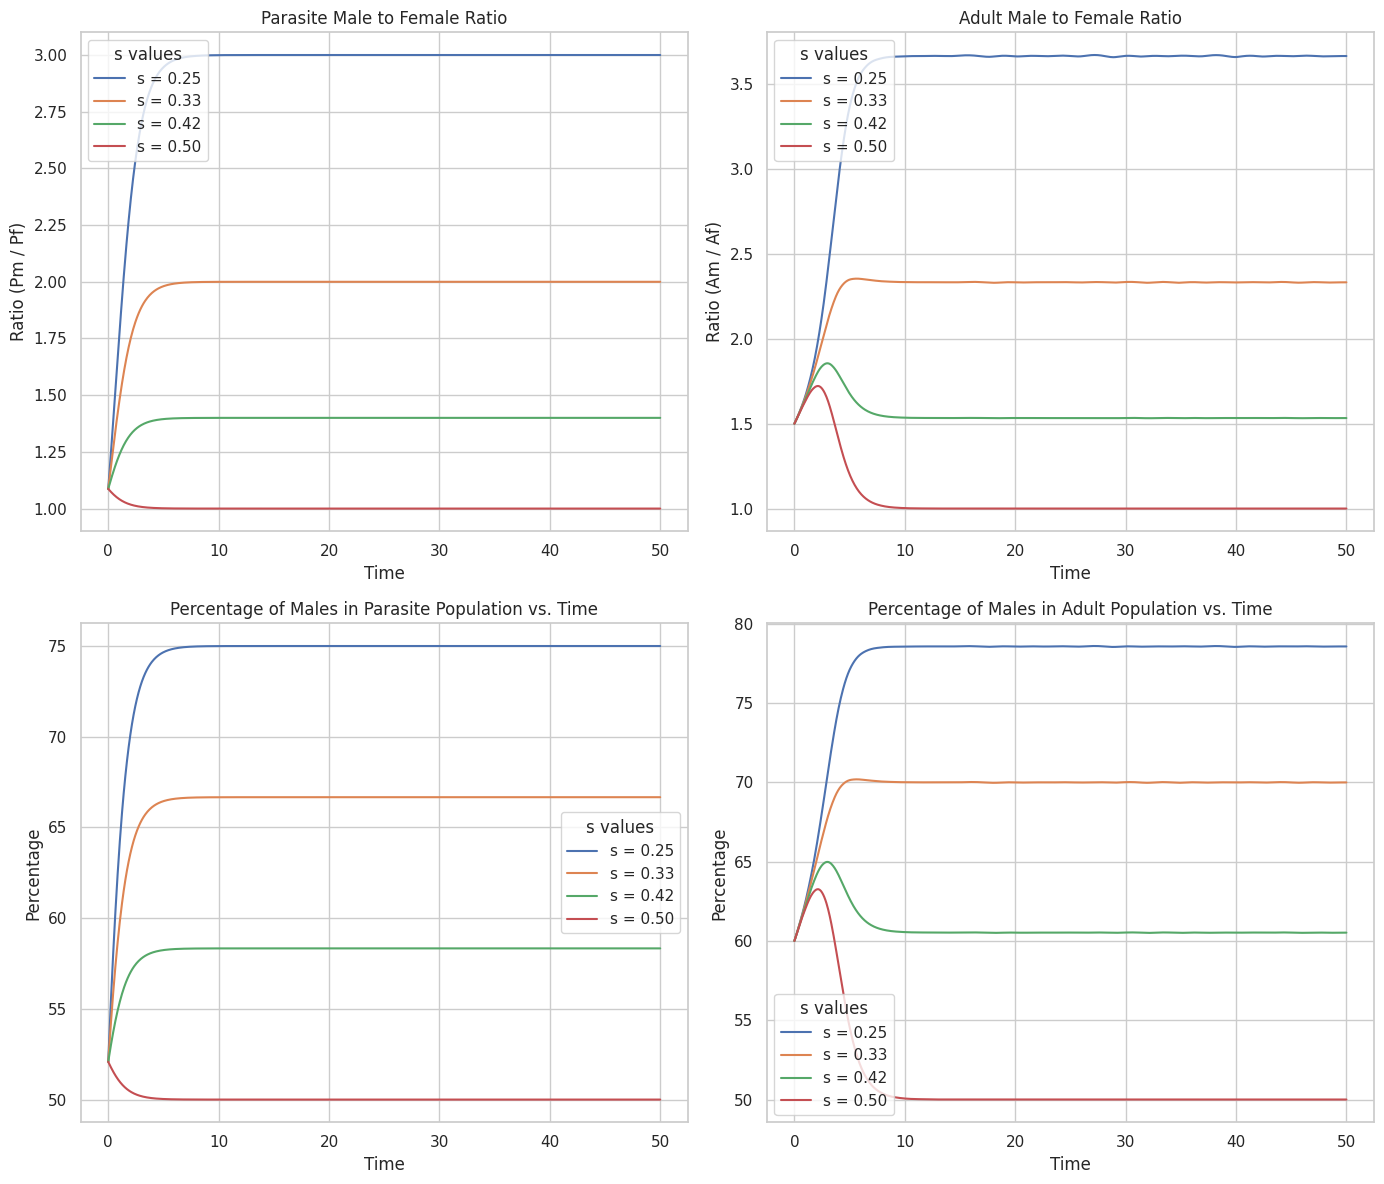

In [57]:
# ################################ Figure 3: Sex Ratios & Percentages for Varied S, Default parameters ###############################
def plot_sex_ratios(results):
    solutions = results["solutions"]
    s_values = solutions.keys()

    # Set up the figure size
    plt.figure(figsize=(14, 12))

    # Plot Parasite Male to Female Ratio (Pm / Pf) vs. Time
    plt.subplot(2, 2, 1)
    for s in s_values:
        solution = solutions[s]
        t = solution.t
        Pm = solution.y[1]
        Pf = solution.y[2]
        parasite_ratio = Pm / Pf  # Avoid division by zero
        parasite_ratio[Pf == 0] = np.inf  # Handle cases where Pf is zero
        plt.plot(t, parasite_ratio, label=f"s = {s:.2f}")
    plt.title("Parasite Male to Female Ratio")
    plt.xlabel("Time")
    plt.ylabel("Ratio (Pm / Pf)")
    plt.legend(title="s values")
    plt.grid(True)

    # Plot Adult Male to Female Ratio (Am / Af) vs. Time
    plt.subplot(2, 2, 2)
    for s in s_values:
        solution = solutions[s]
        t = solution.t
        Am = solution.y[3]
        Af = solution.y[4]
        adult_ratio = Am / Af  # Avoid division by zero
        adult_ratio[Af == 0] = np.inf  # Handle cases where Af is zero
        plt.plot(t, adult_ratio, label=f"s = {s:.2f}")
    plt.title("Adult Male to Female Ratio")
    plt.xlabel("Time")
    plt.ylabel("Ratio (Am / Af)")
    plt.legend(title="s values")
    plt.grid(True)

    # Plot Percentage of Males in Parasite Population vs. Time
    plt.subplot(2, 2, 3)
    for s in s_values:
        solution = solutions[s]
        t = solution.t
        Pm = solution.y[1]
        Pf = solution.y[2]
        total_parasites = Pm + Pf
        percent_male_parasites = (Pm / total_parasites) * 100
        plt.plot(t, percent_male_parasites, label=f"s = {s:.2f}")
    plt.title("Percentage of Males in Parasite Population vs. Time")
    plt.xlabel("Time")
    plt.ylabel("Percentage")
    plt.legend(title="s values")
    plt.grid(True)

    # Plot Percentage of Males in Adult Population vs. Time
    plt.subplot(2, 2, 4)
    for s in s_values:
        solution = solutions[s]
        t = solution.t
        Am = solution.y[3]
        Af = solution.y[4]
        total_adults = Am + Af
        percent_male_adults = (Am / total_adults) * 100
        plt.plot(t, percent_male_adults, label=f"s = {s:.2f}")
    plt.title("Percentage of Males in Adult Population vs. Time")
    plt.xlabel("Time")
    plt.ylabel("Percentage")
    plt.legend(title="s values")
    plt.grid(True)

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plots
    plt.show()

# Call the plotting function
plot_sex_ratios(results)

In [36]:
# Method 1: Lampricide, ks = 50 -> 5
lampricide = model_sea_lamprey_population(ks = 5)

In [54]:
print_fixed_points(lampricide)

Fixed Points for s = 0.25:
L: 5
Pm: 4.166666666666667
Pf: 1.3888888888888888
Am: 0.02970679012345679
Af: 0.008101851851851853
Total: 10.593364197530866

Fixed Points for s = 0.3333333333333333:
L: 5
Pm: 3.703703703703704
Pf: 1.8518518518518516
Am: 0.025205761316872424
Af: 0.010802469135802469
Total: 10.59156378600823

Fixed Points for s = 0.41666666666666663:
L: 5
Pm: 3.240740740740741
Pf: 2.3148148148148144
Am: 0.020704732510288065
Af: 0.013503086419753086
Total: 10.589763374485596

Fixed Points for s = 0.5:
L: 5
Pm: 2.7777777777777777
Pf: 2.7777777777777777
Am: 0.016203703703703703
Af: 0.016203703703703706
Total: 10.587962962962964



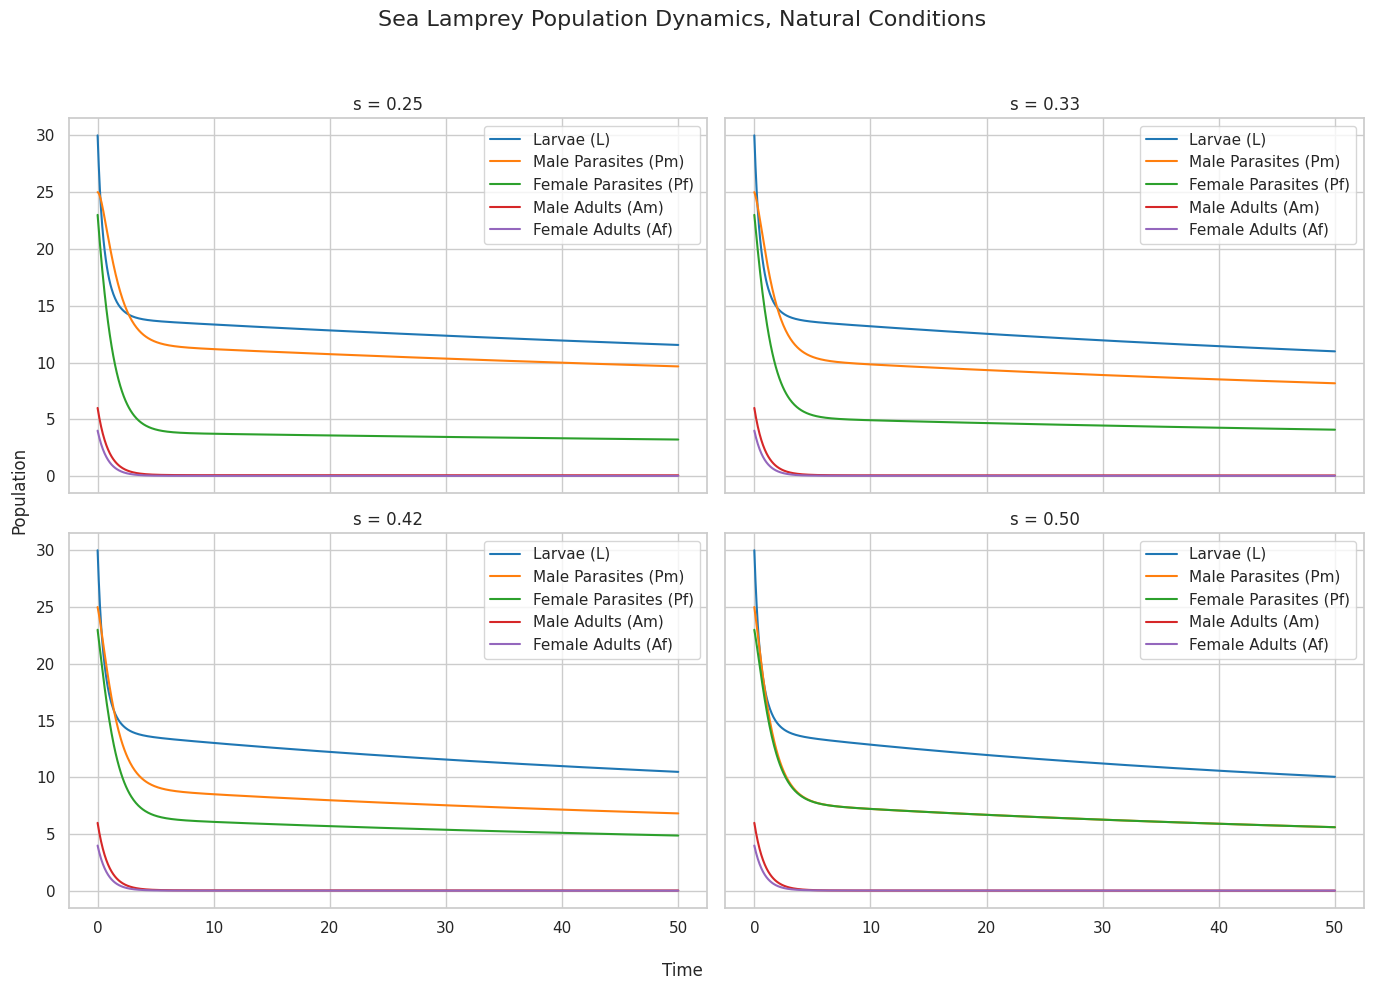

In [41]:
plot_dynams(lampricide)

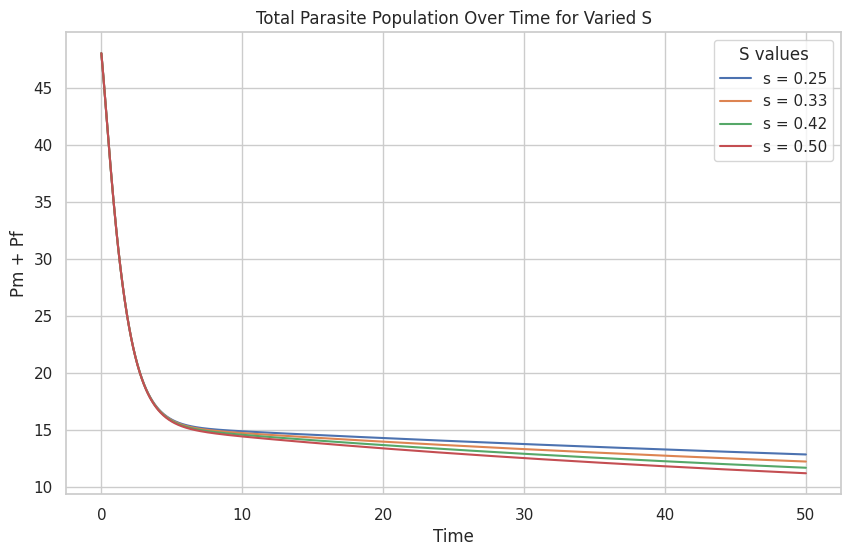

In [45]:
plot_parasite_totals(lampricide)

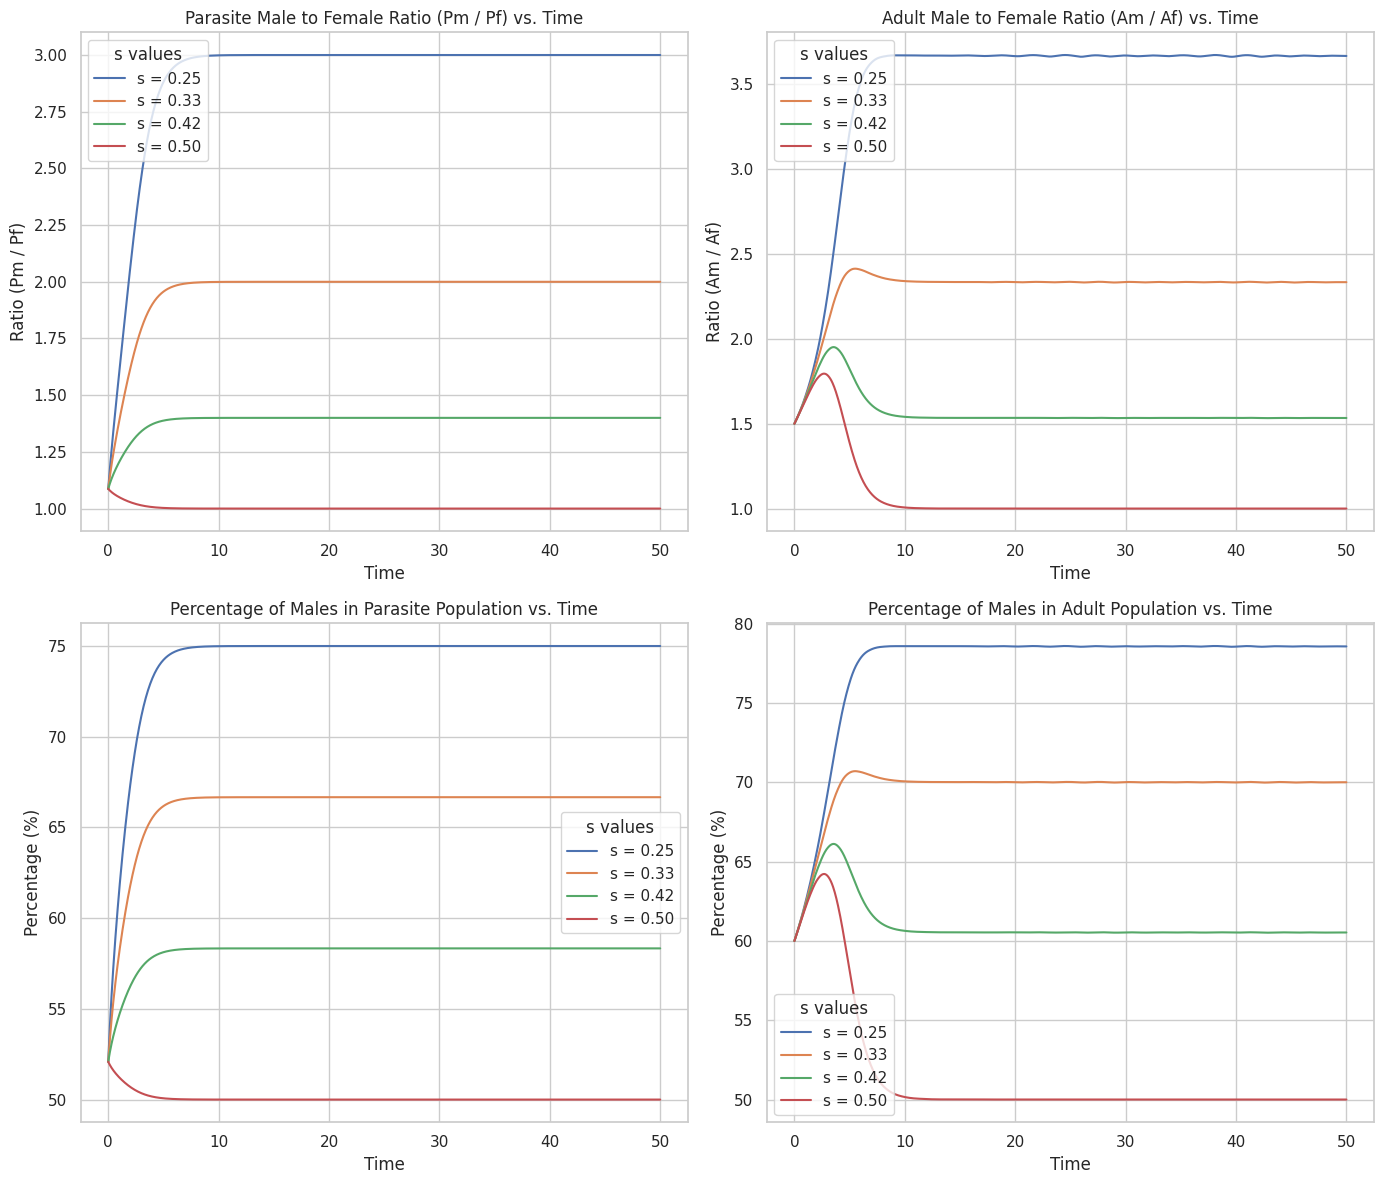

In [46]:
plot_sex_ratios(lampricide)

In [47]:
# Method 2: Barriers, mu = 0.3 -> 0.1
barriers = model_sea_lamprey_population(mu = 0.1)

In [55]:
print_fixed_points(barriers)

Fixed Points for s = 0.25:
L: 50
Pm: 41.666666666666664
Pf: 13.88888888888889
Am: 0.3132716049382716
Af: 0.09722222222222222
Total: 105.96604938271604

Fixed Points for s = 0.3333333333333333:
L: 50
Pm: 37.03703703703704
Pf: 18.518518518518515
Am: 0.27366255144032925
Af: 0.12962962962962962
Total: 105.95884773662551

Fixed Points for s = 0.41666666666666663:
L: 50
Pm: 32.407407407407405
Pf: 23.148148148148145
Am: 0.2340534979423868
Af: 0.162037037037037
Total: 105.95164609053496

Fixed Points for s = 0.5:
L: 50
Pm: 27.77777777777778
Pf: 27.77777777777778
Am: 0.19444444444444442
Af: 0.19444444444444445
Total: 105.94444444444443



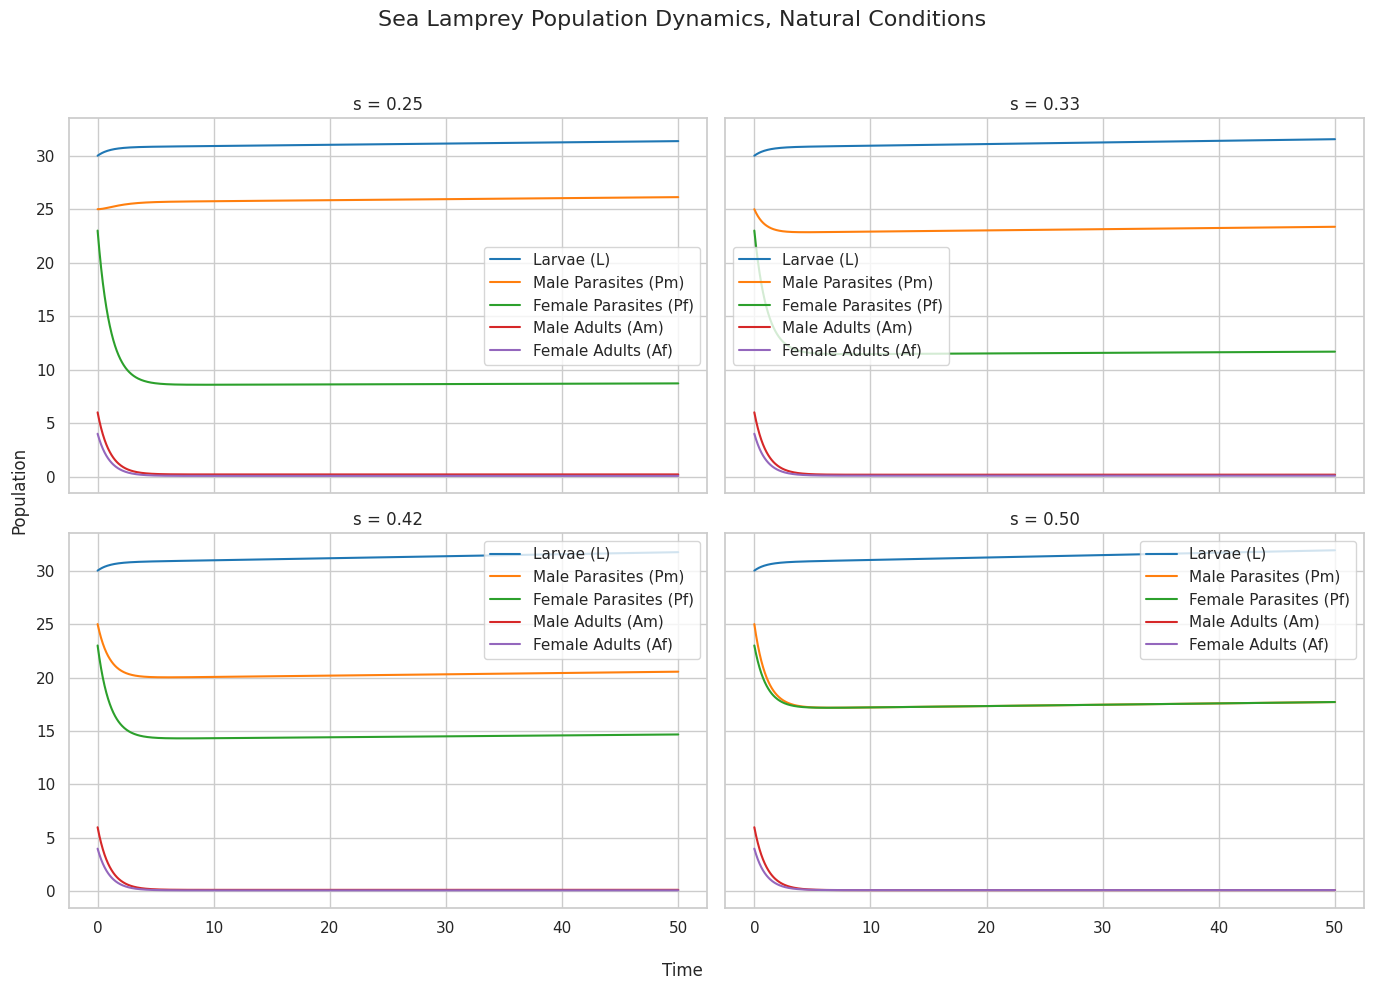

In [48]:
plot_dynams(barriers)

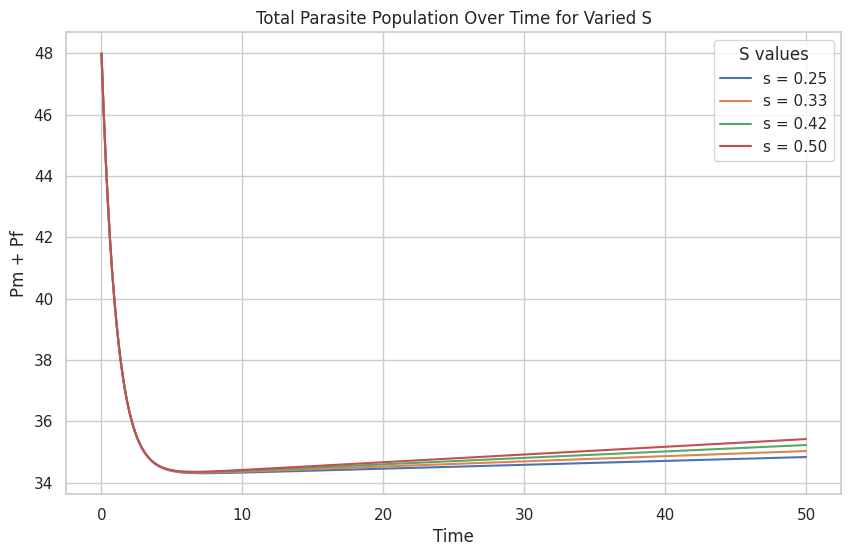

In [49]:
plot_parasite_totals(barriers)

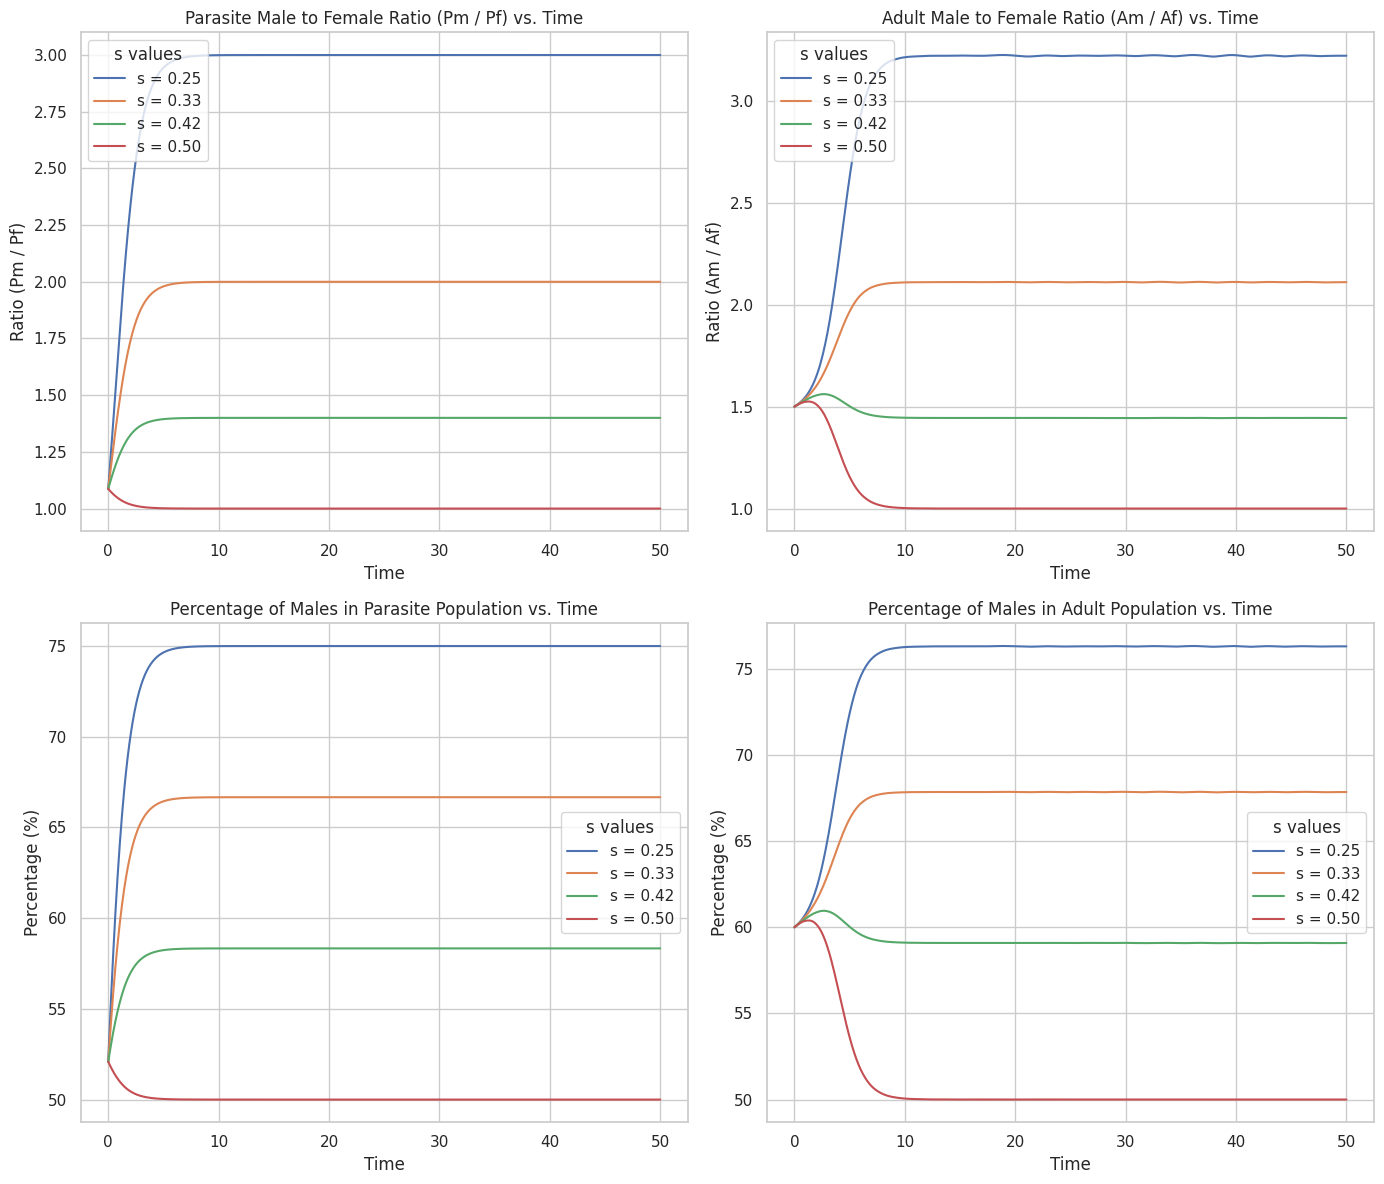

In [50]:
plot_sex_ratios(barriers)